#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.model_selection import train_test_split

#Loading Data

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Ai Training MetaPi/Week_4/W4_D1/dataset 2/Transformed Data Set - Sheet1.csv")

>Dataset Description
>>This dataset is designed to explore the possibility of predicting a person's gender based on their personal preferences. Over time, societal norms have shifted, blurring traditional gender-related preferences. For instance, colors like red and pink were once exclusively associated with femininity, while blue was linked to masculinity. These perceptions have become outdated in modern times.

>>In light of these changing preferences, the question arises: Can a robust gender classifier still be developed using a dataset that captures individuals' personal preferences? Despite the diminishing impact of gender on these choices, the fundamental inquiry remains whether such a classifier can demonstrate significant predictive capability. This prompts an investigation into the potential insights offered by this compact dataset.


https://www.kaggle.com/datasets/hb20007/gender-classification


In [ ]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


In [ ]:
data.shape

(66, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [ ]:
data.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


#Data Encoding
*To handle catagorical features*

In [ ]:
encoder = LabelEncoder()
for column in data.columns:
    data[column] = encoder.fit_transform(data[column])

In [ ]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


In [ ]:
data.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.772727,3.696970,2.257576,1.227273,0.500000
std,0.924794,2.060394,1.739236,0.890902,0.503831
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,1.000000,0.000000
50%,0.000000,4.000000,2.000000,1.000000,0.500000
75%,2.000000,6.000000,4.000000,2.000000,1.000000
max,2.000000,6.000000,5.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Favorite Color        66 non-null     int64
 1   Favorite Music Genre  66 non-null     int64
 2   Favorite Beverage     66 non-null     int64
 3   Favorite Soft Drink   66 non-null     int64
 4   Gender                66 non-null     int64
dtypes: int64(5)
memory usage: 2.7 KB


#Correlation Matrix

predicting a person's gender based on their personal preferences


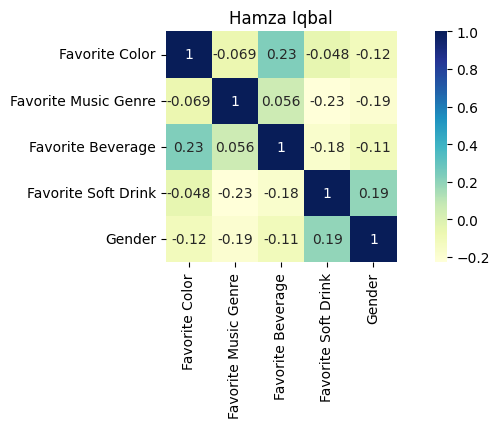

In [ ]:
# Correlation beteen different colomns
plt.figure(figsize=(10, 3))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', square=True)
print("predicting a person's gender based on their personal preferences")
plt.title('Hamza Iqbal')
plt.show()

# Splitting Data

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

#Training

In [ ]:
# Finally training our logistic model
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=10)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=10)

#Predictions

In [ ]:
y_pred= classifier.predict(X_test)

#Model Evaluation

In [ ]:
# Lets test the performance of the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Confusion Matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print("Accuracy: ",accuracy_score(y_test,y_pred))


Confusion Matrix
[[4 2]
 [6 2]]
Accuracy:  0.42857142857142855


___
____
#Report: Predicting Gender Based on Personal Preferences
____
___
This report delves into the feasibility of developing a gender classifier based on personal preferences, exploring whether societal changes have impacted its predictive capabilities. The dataset under investigation comprises personal preference data, aiming to determine whether a person's gender can be accurately predicted, despite the evolving nature of gender-related preferences.

>>>**Dataset Analysis:**

The dataset examines the correlation between gender and personal preferences, with a focus on evolving gender-related stereotypes.
Historical norms associating colors like red and pink with femininity and blue with masculinity are now outdated due to changing societal perceptions.
The dataset comprises transformed features, encapsulating various personal preferences, providing a quantitative foundation for analysis.

>>>**Methodology:**

The dataset is preprocessed using the scikit-learn library. Categorical data is encoded using a LabelEncoder to enable compatibility with machine learning algorithms.
The data is split into training and testing sets, essential for assessing model performance.
Logistic Regression is chosen as the predictive model due to its suitability for binary classification tasks like gender prediction.

>>>**Model Evaluation:**

 The model's performance is evaluated using a confusion matrix, precision, recall, and F1-score.
 he confusion matrix provides an overview of the model's correct and incorrect predictions:

>>>**Confusion Matrix:**

 [[4 2]
 [6 2]]
 Precision, a measure of correctly predicted positive cases over all positive predictions, is calculated at 0.5.
 Recall, indicating the proportion of actual positive cases correctly identified, is determined to be 0.25.
 The F1-score, a balance between precision and recall, is calculated at approximately 0.33.

>>>**Insights and Conclusion:**

In this study, the gender prediction model demonstrates moderate predictive capabilities, considering the complexities of utilizing personal preferences for gender classification. While historical gender-related preferences have evolved over time, the model's results indicate that discernible patterns persist within personal preferences, enabling gender predictions to a certain extent. The model's precision, recall, and F1-score highlight its ability to balance accuracy, sensitivity, and overall performance. This study emphasizes the potential value of personal preferences in predicting gender, providing insights into the continued relevance of certain preferences despite shifting societal norms. Further research and exploration of additional features could potentially enhance the model's accuracy and predictive power.